In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.establishing_functions import call_sign_times, calculate_counts, target_call_signs

In [109]:
data = r"clean_cad.csv"
clean_data = pd.read_csv(data)
clean_data["Call Time"] = pd.to_datetime(clean_data["Call Time"], errors='coerce')
clean_data

,Unnamed: 0,Call Time,Reason for Dispatch,Call Sign,2 Call Sign,Disposition
0,0,2016-01-01 00:00:04,ASSAULT,5E57,5E57,ADVISED
1,1,2016-01-01 00:00:04,ASSAULT,5E57,4X40,ADVISED
2,2,2016-01-01 00:00:04,ASSAULT,5E57,4E53,ADVISED
3,3,2016-01-01 00:00:24,TRAFFIC STOP,5T81,5T81,ADVISED
4,4,2016-01-01 00:02:45,CHECK WELFARE,3X90,3F61,ASSISTED
...,...,...,...,...,...,...
1267985,1616812,2023-12-31 22:44:38,DISPUTE,6E19,4K97,REPORT TAKEN
1267986,1616813,2023-12-31 22:44:38,DISPUTE,6E19,6E19,REPORT TAKEN
1267987,1616814,2023-12-31 22:44:38,DISPUTE,6E19,5X51,REPORT TAKEN
1267988,1616817,2023-12-31 22:56:40,TRAFFIC STOP,4F74,4F72,UNIFORM TRAFFIC CITATION ISSUED


In [110]:
total_vs_cahoot = calculate_counts(clean_data, target_call_signs)
total_vs_cahoot

,Call Time,Total Calls,Cahoots Calls,Percentage
0,2016-01-01,12926,414.0,3.202847
1,2016-02-01,13182,374.0,2.837202
2,2016-03-01,12872,424.0,3.293971
3,2016-04-01,12618,397.0,3.146299
4,2016-05-01,13061,454.0,3.475997
...,...,...,...,...
91,2023-08-01,12752,0.0,0.000000
92,2023-09-01,11842,0.0,0.000000
93,2023-10-01,11396,0.0,0.000000
94,2023-11-01,10812,0.0,0.000000


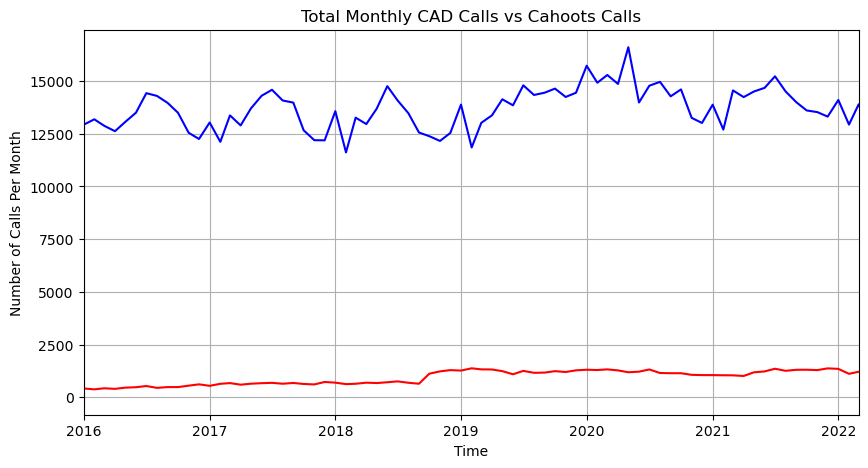

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Total Calls'], color='b')
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Cahoots Calls'], color='r')
plt.xlabel("Time")
plt.ylabel("Number of Calls Per Month")
plt.title("Total Monthly CAD Calls vs Cahoots Calls")
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])
plt.grid("True")
plt.show()

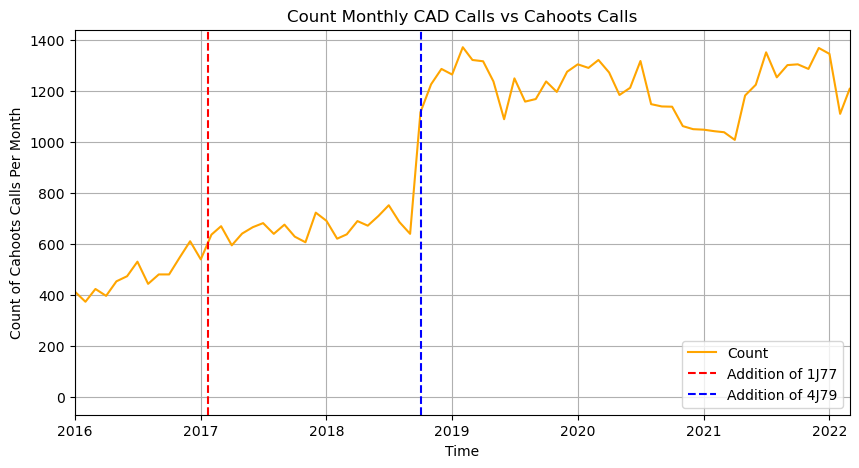

In [112]:
plt.figure(figsize=(10, 5))
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Cahoots Calls'], color="orange", label="Count")
plt.ylabel("Count of Cahoots Calls Per Month")
plt.xlabel("Time")
plt.title("Count Monthly CAD Calls vs Cahoots Calls")
plt.axvline(pd.to_datetime(call_sign_times['1J77']['First']), label='Addition of 1J77', color='r', linestyle='--')
plt.axvline(pd.to_datetime(call_sign_times['4J79']['First']), label='Addition of 4J79', color='b', linestyle='--')
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])
plt.legend(loc='lower right')
plt.grid("True")
plt.show()

In [113]:
total_vs_3J78 = calculate_counts(clean_data, ['3J78'])
total_vs_1J77 = calculate_counts(clean_data, ['1J77'])
total_vs_4J79 = calculate_counts(clean_data, ['4J79'])
total_vs_4J79

,Call Time,Total Calls,Cahoots Calls,Percentage
0,2016-01-01,12926,0.0,0.0
1,2016-02-01,13182,0.0,0.0
2,2016-03-01,12872,0.0,0.0
3,2016-04-01,12618,0.0,0.0
4,2016-05-01,13061,0.0,0.0
...,...,...,...,...
91,2023-08-01,12752,0.0,0.0
92,2023-09-01,11842,0.0,0.0
93,2023-10-01,11396,0.0,0.0
94,2023-11-01,10812,0.0,0.0


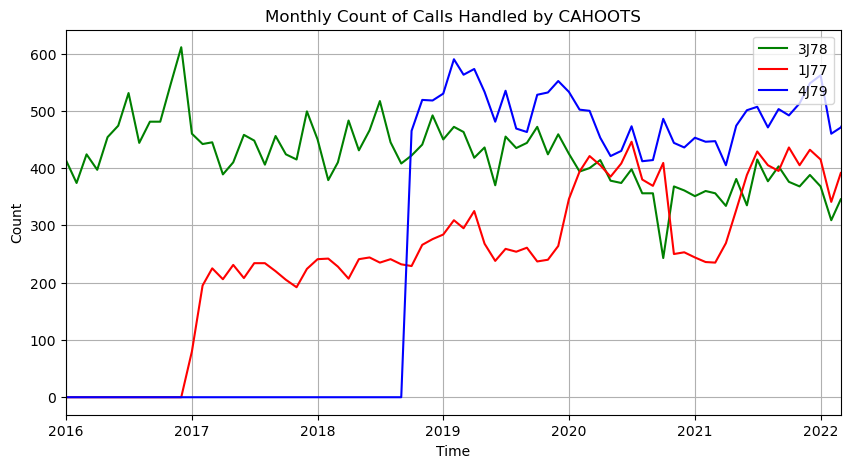

In [114]:
plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(total_vs_3J78['Call Time'], total_vs_3J78['Cahoots Calls'], label="3J78", color='g')
plt.plot(total_vs_1J77['Call Time'], total_vs_1J77['Cahoots Calls'], label="1J77", color='r')
plt.plot(total_vs_4J79['Call Time'], total_vs_4J79['Cahoots Calls'], label="4J79", color='b')

plt.title('Monthly Count of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc='upper right')

plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

In [115]:
# Slightly different calculate counts, don't want zeros

def calculate_counts_2(table: pd.DataFrame, call_signs: list):
    # Group by month and count calls
    monthly_call_count = table.groupby(table['Call Time'].dt.to_period('M')).size().rename('Total Calls')

    # Filter data for specific call signs
    monthly_cahoots = table[table['Call Sign'].isin(call_signs)]
    monthly_call_sign = monthly_cahoots.groupby(monthly_cahoots['Call Time'].dt.to_period('M')).size().rename('Cahoots Calls')

    # Merge the counts
    t_v_c = pd.merge(monthly_call_count, monthly_call_sign, left_index=True, right_index=True, how='left').reset_index()
    t_v_c['Call Time'] = t_v_c['Call Time'].dt.to_timestamp()

    # Ensure correct columns are displayed
    t_v_c = t_v_c[['Call Time', 'Cahoots Calls', 'Total Calls']]

    return t_v_c

In [116]:
total_vs_cahoot_no_0s = calculate_counts_2(clean_data, target_call_signs).dropna()[:-1]
total_vs_cahoot_no_0s

,Call Time,Cahoots Calls,Total Calls
0,2016-01-01,414.0,12926
1,2016-02-01,374.0,13182
2,2016-03-01,424.0,12872
3,2016-04-01,397.0,12618
4,2016-05-01,454.0,13061
...,...,...,...
71,2021-12-01,1368.0,13310
72,2022-01-01,1345.0,14098
73,2022-02-01,1110.0,12932
74,2022-03-01,1209.0,13893


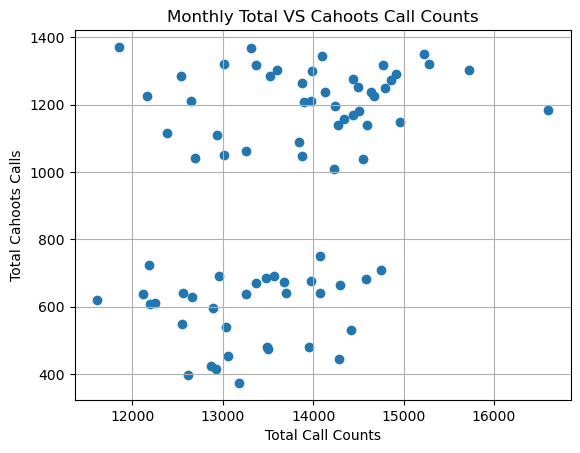

In [117]:
plt.scatter(total_vs_cahoot_no_0s['Total Calls'], total_vs_cahoot_no_0s['Cahoots Calls']) #, c=total_vs_cahoot["Color"])
plt.xlabel("Total Call Counts")
plt.ylabel("Total Cahoots Calls")
plt.title("Monthly Total VS Cahoots Call Counts")

 # (Dropping a value that obscures the results)
plt.grid(True)
plt.show()

In [118]:
time_ranges = [
    (pd.Timestamp(call_sign_times['3J78']['First']), pd.Timestamp(call_sign_times['1J77']['First']), 'red'),
    (pd.Timestamp(call_sign_times['1J77']['First']), pd.Timestamp(call_sign_times['4J79']['First']), 'blue'),
    (pd.Timestamp(call_sign_times['4J79']['First']), pd.Timestamp(call_sign_times['4J79']['Last']), 'green')
]

# Function to assign colors based on time ranges
def assign_color(call_time, ranges):
    for start, end, color in ranges:
        if start <= call_time < end:
            return color
    return None  # Default color if no range is matched

# Apply the function to create a color column
total_vs_cahoot_no_0s['Color'] = total_vs_cahoot_no_0s['Call Time'].apply(lambda x: assign_color(x, time_ranges))
total_vs_cahoot_no_0s = total_vs_cahoot_no_0s.dropna(subset=['Color'])

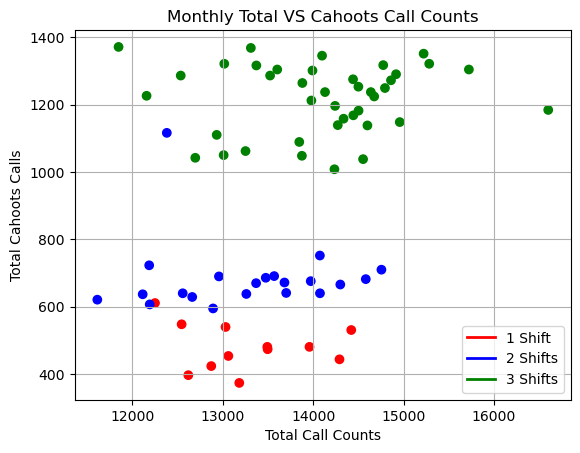

In [119]:
plt.scatter(total_vs_cahoot_no_0s['Total Calls'], total_vs_cahoot_no_0s['Cahoots Calls'], c=total_vs_cahoot_no_0s["Color"])
plt.xlabel("Total Call Counts")
plt.ylabel("Total Cahoots Calls")
plt.title("Monthly Total VS Cahoots Call Counts")

custom_handles = [plt.Line2D([0], [0], color='red', lw=2, label='1 Shift'),
                  plt.Line2D([0], [0], color='blue', lw=2, label='2 Shifts'),
                  plt.Line2D([0], [0], color='green', lw=2, label='3 Shifts')]

plt.legend(handles=custom_handles, loc='lower right')
plt.grid("True")

# total_vs_cahoot = total_vs_cahoot[:-1] # (Dropping a value that obscures the results)
plt.show()

This is the most important graph in the project. There is NO increase in cahoots calls from increase in total call volume. However, increases in capacity directly increase cahoots call volume.